# Heart attack analysis

## Importación de librerías

In [2]:
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## User Defined Functions

In [3]:

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, label=label, marker='o')  # Add markers for data points
    plt.plot([0, 1], [0, 1], 'k--')  # Add diagonal line
    plt.xlim(0, 1)  # Set axis limits
    plt.ylim(0, 1)
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC Curve')
    if label:
        plt.legend()  # Add legend if label is provided

## Carga de datos

In [4]:
carpeta_actual = os.getcwd()
df_heart = pd.read_csv(os.path.join(carpeta_actual, "heart-attack-analysis-prediction-dataset\\heart.csv"))
df_heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


No hay elementos null en el dataset.

In [6]:
df_heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trtbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalachh'}>],
       [<Axes: title={'center': 'exng'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slp'}>, <Axes: title={'center': 'caa'}>],
       [<Axes: title={'center': 'thall'}>,
        <Axes: title={'center': 'output'}>, <Axes: >, <Axes: >]],
      dtype=object)

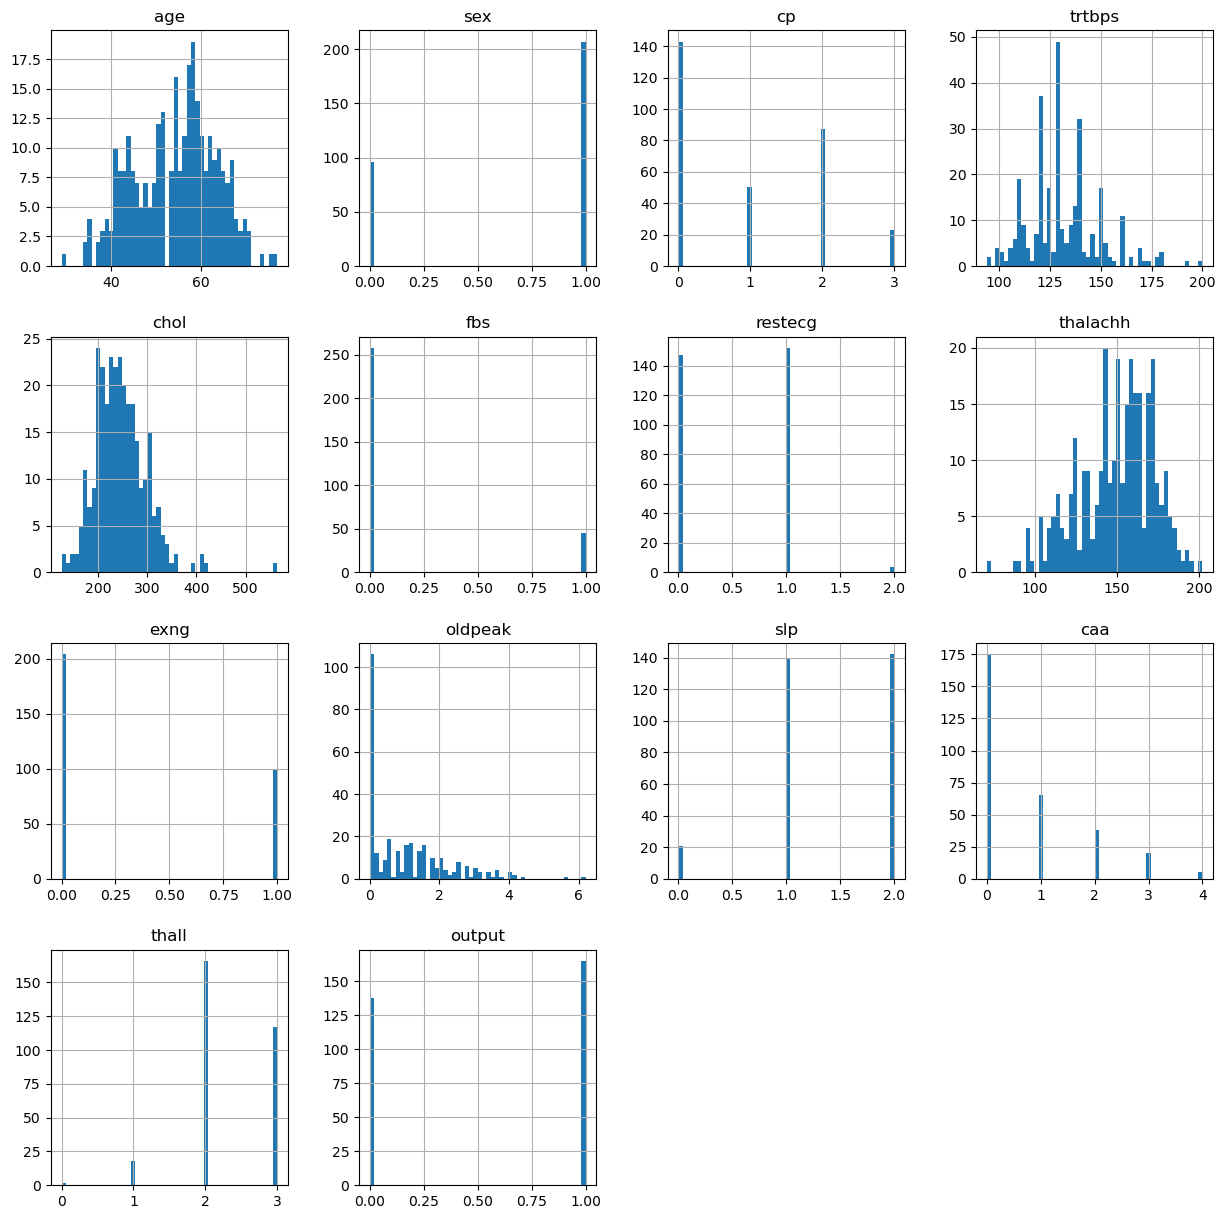

In [7]:
df_heart.hist(bins=50, figsize=(15,15))

## Preparación de los datos

#### Renombrado de las columnas

In [8]:
df_heart.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [9]:
df_heart = df_heart.rename(columns={"age": "edad", "sex": "sexo", "cp": "dolor_pecho","trtbps":"presion_arterial_reposo", "chol": "colesterol", "fbs": "glucemia_ayunas", "restecg": "elec_reposo", "thalachh": "ritmo_cardiaco_max", "exng": "angina_por_ejercicio", "oldpeak":"antiguo_pico"})

- **sexo** --> 1: masculino || 2: femenino
- **dolor_pecho** --> 0-3
- **gleucemia_ayunas** > 120 mg/dl --> 1:True || 2:False
- **angina_por_ejercicio** --> 1:Yes || 0:No

## Matriz de correlación

In [10]:
corr_matrix = df_heart.corr()
corr_matrix["output"].sort_values(ascending=False)

output                     1.000000
dolor_pecho                0.433798
ritmo_cardiaco_max         0.421741
slp                        0.345877
elec_reposo                0.137230
glucemia_ayunas           -0.028046
colesterol                -0.085239
presion_arterial_reposo   -0.144931
edad                      -0.225439
sexo                      -0.280937
thall                     -0.344029
caa                       -0.391724
antiguo_pico              -0.430696
angina_por_ejercicio      -0.436757
Name: output, dtype: float64

<Axes: >

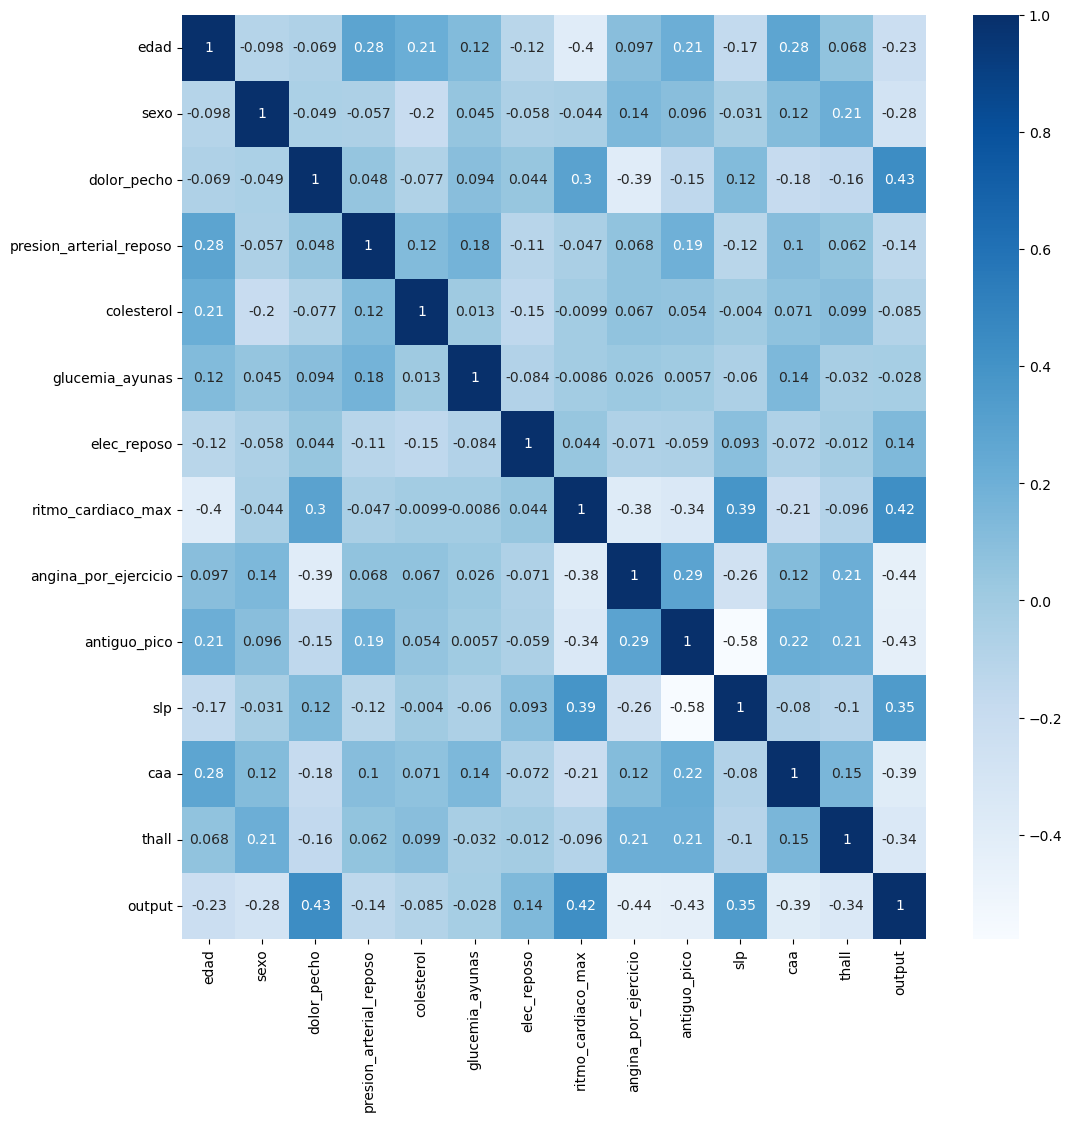

In [11]:
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True, cmap="Blues")

## Entrenamiento de modelos

> Sacar variables de entrenamiento y test

In [12]:
from sklearn.model_selection import train_test_split
y = df_heart["output"]
X_train, X_test, y_train, y_test = train_test_split(df_heart.drop('output', axis=1), y, test_size=0.25)


### SGDC

In [13]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [34]:
sgd_clf.predict(X_test)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### Confusion Matrix

In [29]:
y_train_pred = cross_val_predict(sgd_clf,X_train, y_train, cv=3)

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[48, 56],
       [44, 79]], dtype=int64)

- 48 verdaderos negativos
- 79 verdaderos positivos

### Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train, cv=3, method="predict_proba")

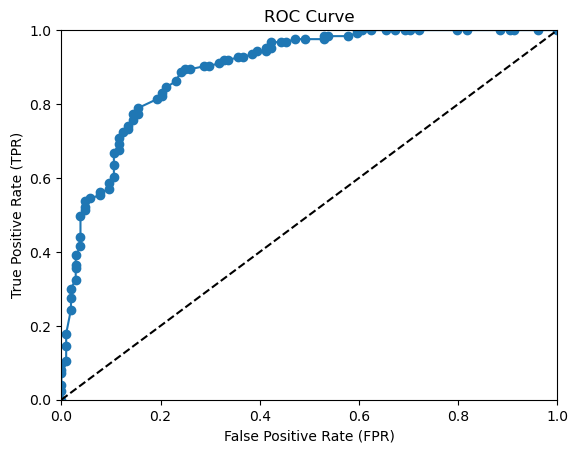

In [16]:
from sklearn.metrics import roc_curve

y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_scores_forest)
plot_roc_curve(fpr_forest, tpr_forest)

### Precision y recall

In [17]:
from sklearn.metrics import precision_score, recall_score
precision_ = precision_score(y_train, y_train_pred)

In [18]:
recall_ = recall_score(y_train, y_train_pred)

In [21]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=3,
                             method="decision_function")

In [22]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

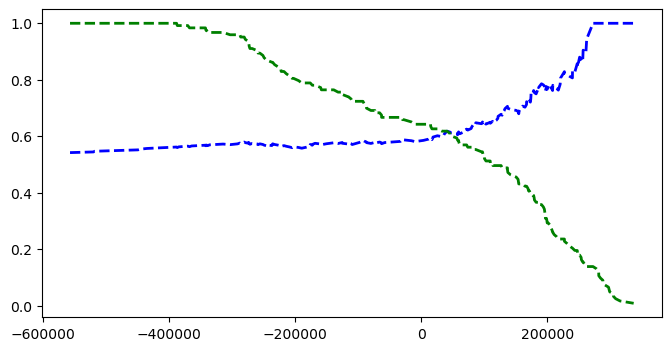

In [23]:
plt.figure(figsize=(8,4))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g--", label="Recall", linewidth=2)

Text(0, 0.5, 'Precision')

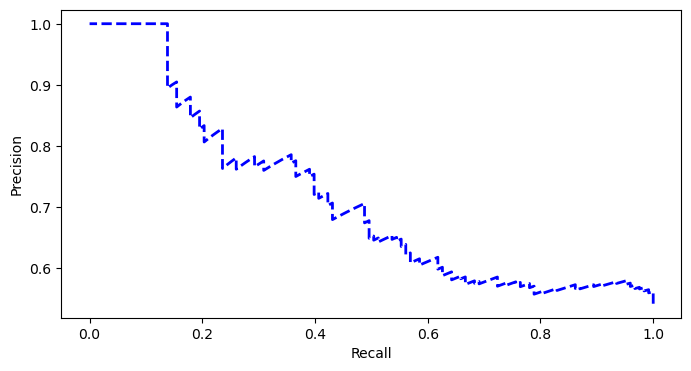

In [26]:
plt.figure(figsize=(8,4))
plt.plot(recalls, precisions, "b--", label="Precision/recall", linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")

### Cross val scoring Accuracy

In [24]:
from sklearn.model_selection import cross_val_score

cross_accuracy = cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

In [25]:
print(f"- Puntuaje de precisión: {precision_}\n- Puntuaje de sensibilidad: {recall_}\n- Puntuaje de cross val con score 'Accuracy': {cross_accuracy}\n")

- Puntuaje de precisión: 0.5851851851851851
- Puntuaje de sensibilidad: 0.6422764227642277
- Puntuaje de cross val con score 'Accuracy': [0.65789474 0.47368421 0.54666667]

